```{=html}
<iframe class="slide-deck" style="border:1px solid lightgray;" width="100%" height="500" src="presentation.html"></iframe>
```


[Presentation in standalone browser tab.](presentation.html){.internal target="_blank"}

# Executive Summary

 # Introduction

# Data Source
we used a data set from the website of Times Higher Education, we got the data from Json on the site and cleaned the data because some columns did not have data or some rows had N/A.



In [124]:
#| include: false
import pandas as pd
import numpy as np

from pandas.core.tools.numeric import to_numeric
import geopandas as gpd
import plotly as px
import plotly.express as px # for interactive plots
import plotly.graph_objs as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind
from sklearn.feature_selection import VarianceThreshold
import os
import warnings
warnings.filterwarnings("ignore")

In [163]:
#| label: data-import
df = pd.read_csv('data\data.csv')
df.head() 

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,...,nid,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,stats_proportion_of_isr,aliases,subjects_offered,disabled
0,10,1,University of Oxford,98.5,10,96.6,5,100.0,2,99.0,...,468,United Kingdom,"21,750",10.9,42%,49:51:00,23%,University of Oxford,"Geography,Chemistry,Chemical Engineering,Biolo...",False
1,20,2,Stanford University,98,20,99.0,1,97.8,8,99.6,...,467,United States,"14,517",6.4,23%,47:53:00,22%,Stanford University,"Computer Science,Communication & Media Studies...",False
2,30,3,Massachusetts Institute of Technology,97.9,30,98.6,2,96.2,11,99.7,...,471,United States,"11,085",8.0,33%,41:59:00,40%,Massachusetts Institute of Technology,"Architecture,Economics & Econometrics,Archaeol...",False
3,40,4,Harvard University,97.8,40,97.7,3,99.9,3,99.4,...,466,United States,"20,050",9.0,25%,51:49:00,12%,Harvard University,"Sociology,Architecture,Physics & Astronomy,Psy...",False
4,50,5,University of Cambridge,97.5,50,95.8,7,100.0,1,98.0,...,470,United Kingdom,"20,565",11.5,38%,48:52:00,27%,University of Cambridge,Politics & International Studies (incl Develop...,False


In [164]:
import pandas as pd


def clean_and_convert(value):
    try:
      
        if ':' in value:
            parts = value.split(':')
            if len(parts) == 3:  
                value = ':'.join(parts[:2])  

    
        if ':' in value:
            female, male = map(int, value.split(':'))
            return round((female / (female + male)) * 100, 2)  
        else:
            
            return round(float(value) * 100, 2)
    except:
        return None  

df['female_percentage'] = df['stats_female_male_ratio'].apply(clean_and_convert)
print(df)

      rank_order      rank                                   name  \
0             10         1                   University of Oxford   
1             20         2                    Stanford University   
2             30         3  Massachusetts Institute of Technology   
3             40         4                     Harvard University   
4             50         5                University of Cambridge   
...          ...       ...                                    ...   
2666     1000760  Reporter                       Zarqa University   
2667     1000761  Reporter                     Zhetysu University   
2668     1000762  Reporter  Zhytomyr Polytechnic State University   
2669     1000763  Reporter      Ziane Achour University of Djelfa   
2670     1000764  Reporter                    Ziauddin University   

     scores_overall  scores_overall_rank  scores_teaching  \
0              98.5                   10             96.6   
1                98                   20         

In [166]:
#| label: show how many rows and coloumn in data set
df.shape

(2671, 28)

With this function, we check all culmns and their type

In [167]:
#| label: Get informaion
# getting data on dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         2671 non-null   int64  
 1   rank                               2671 non-null   object 
 2   name                               2671 non-null   object 
 3   scores_overall                     1907 non-null   object 
 4   scores_overall_rank                2671 non-null   int64  
 5   scores_teaching                    1907 non-null   float64
 6   scores_teaching_rank               2671 non-null   int64  
 7   scores_research                    1907 non-null   float64
 8   scores_research_rank               2671 non-null   int64  
 9   scores_citations                   1907 non-null   float64
 10  scores_citations_rank              2671 non-null   int64  
 11  scores_industry_income             1907 non-null   float

In [168]:
df = pd.DataFrame(df)


reporter_rows = df[df['rank'] == 'Reporter']

if not reporter_rows.empty:
    
    index_to_drop = reporter_rows.index[0]
    
    
    df = df.iloc[:index_to_drop]

print(df)


      rank_order   rank                                            name  \
0             10      1                            University of Oxford   
1             20      2                             Stanford University   
2             30      3           Massachusetts Institute of Technology   
3             40      4                              Harvard University   
4             50      5                         University of Cambridge   
...          ...    ...                                             ...   
1902       19030  1501+                              Yanshan University   
1903       19040  1501+                             Yeditepe University   
1904       19050  1501+                        Yerevan State University   
1905       19060  1501+  Yuriy Fedkovych Chernivtsi National University   
1906       19070  1501+              Zonguldak Bülent Ecevit University   

     scores_overall  scores_overall_rank  scores_teaching  \
0              98.5                   

In [169]:
import pandas as pd

# فرض می‌کنیم DataFrame شما قبلاً خوانده شده و df نام دارد.
# مثال: df = pd.read_csv('your_file.csv')

# حذف فاصله‌های اضافی از نام ستون‌ها در صورت وجود
df.columns = df.columns.str.strip()

# اطمینان از اینکه خط تیره‌های مختلف به یک فرمت استاندارد تبدیل شوند
df['scores_overall'] = df['scores_overall'].str.replace('–', '-')  # تبدیل "–" به "-"
df['rank'] = df['rank'].str.replace('–', '-')  # تبدیل "–" به "-"

# تابع برای تبدیل بازه به میانگین، مدیریت مقادیر ثابت و همچنین مقادیر دارای "+" در rank
def calculate_average(value):
    value = value.strip()  # حذف فضای اضافی
    if '-' in value:  # اگر بازه‌ای مانند "55.9-58.6" باشد
        min_val, max_val = map(float, value.split('-'))
        return (min_val + max_val) / 2
    elif '+' in value:  # اگر مقداری مانند "1501+" باشد
        return float(value.replace('+', ''))  # حذف "+" و تبدیل به عدد
    else:  # مقدار ثابت مانند "1501" باشد
        return float(value)

# اعمال تابع برای ستون‌های rank و scores_overall
df['rank'] = df['rank'].apply(calculate_average)
df['scores_overall'] = df['scores_overall'].apply(calculate_average)

# نمایش DataFrame نهایی
print(df)


      rank_order    rank                                            name  \
0             10     1.0                            University of Oxford   
1             20     2.0                             Stanford University   
2             30     3.0           Massachusetts Institute of Technology   
3             40     4.0                              Harvard University   
4             50     5.0                         University of Cambridge   
...          ...     ...                                             ...   
1902       19030  1501.0                              Yanshan University   
1903       19040  1501.0                             Yeditepe University   
1904       19050  1501.0                        Yerevan State University   
1905       19060  1501.0  Yuriy Fedkovych Chernivtsi National University   
1906       19070  1501.0              Zonguldak Bülent Ecevit University   

      scores_overall  scores_overall_rank  scores_teaching  \
0               98.5     

In [170]:
df

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,...,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,stats_proportion_of_isr,aliases,subjects_offered,disabled,female_percentage
0,10,1.0,University of Oxford,98.5,10,96.6,5,100.0,2,99.0,...,United Kingdom,"21,750",10.9,42%,49:51:00,23%,University of Oxford,"Geography,Chemistry,Chemical Engineering,Biolo...",False,49.0
1,20,2.0,Stanford University,98.0,20,99.0,1,97.8,8,99.6,...,United States,"14,517",6.4,23%,47:53:00,22%,Stanford University,"Computer Science,Communication & Media Studies...",False,47.0
2,30,3.0,Massachusetts Institute of Technology,97.9,30,98.6,2,96.2,11,99.7,...,United States,"11,085",8.0,33%,41:59:00,40%,Massachusetts Institute of Technology,"Architecture,Economics & Econometrics,Archaeol...",False,41.0
3,40,4.0,Harvard University,97.8,40,97.7,3,99.9,3,99.4,...,United States,"20,050",9.0,25%,51:49:00,12%,Harvard University,"Sociology,Architecture,Physics & Astronomy,Psy...",False,51.0
4,50,5.0,University of Cambridge,97.5,50,95.8,7,100.0,1,98.0,...,United Kingdom,"20,565",11.5,38%,48:52:00,27%,University of Cambridge,Politics & International Studies (incl Develop...,False,48.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,19030,1501.0,Yanshan University,16.2,19030,19.5,1428,11.7,1450,34.5,...,China,"39,191",13.4,1%,39 : 61,43%,Yanshan University,"Languages, Literature & Linguistics,Mathematic...",False,39.0
1903,19040,1501.0,Yeditepe University,16.2,19040,22.0,1235,12.4,1373,17.6,...,Turkey,"17,378",27.5,6%,55:45:00,19%,Yeditepe University,"Mechanical & Aerospace Engineering,Economics &...",False,55.0
1904,19050,1501.0,Yerevan State University,16.2,19050,23.9,1088,8.6,1852,26.8,...,Armenia,"13,838",8.0,2%,53:47:00,39%,Yerevan State University,"History, Philosophy & Theology,Business & Mana...",False,53.0
1905,19060,1501.0,Yuriy Fedkovych Chernivtsi National University,16.2,19060,22.8,1169,9.9,1666,8.2,...,Ukraine,"10,592",10.4,1%,56:44:00,30%,Yuriy Fedkovych Chernivtsi National University,"History, Philosophy & Theology,Mathematics & S...",False,56.0


Each column in the dataset represents a specific feature or indicator related to the performance and characteristics of universities. Here's what each column signifies:

### 1. **`rank_order`**
   - **Description:** Indicates the ranking order of universities in this list.
   - **Meaning:** The rank number based on the overall position of the university.

### 2. **`rank`**
   - **Description:** The overall global rank of the university.
   - **Meaning:** The rank of the university based on final evaluation across various metrics.

### 3. **`name`**
   - **Description:** Name of the university.
   - **Meaning:** The name of the educational institution included in this ranking.

### 4. **`scores_overall`**
   - **Description:** The overall score of the university based on all criteria.
   - **Meaning:** The final score reflecting the university's overall performance.

### 5. **`scores_overall_rank`**
   - **Description:** The rank of the university based on the overall score.
   - **Meaning:** The rank of the university according to its overall score.

### 6. **`scores_teaching`**
   - **Description:** The university's score for teaching.
   - **Meaning:** The performance of the university in terms of teaching quality and educational impact.

### 7. **`scores_teaching_rank`**
   - **Description:** The rank of the university based on teaching score.
   - **Meaning:** The position of the university in the teaching metric.

### 8. **`scores_research`**
   - **Description:** The university's score for research.
   - **Meaning:** The performance of the university in research, publication output, and scientific contributions.

### 9. **`scores_research_rank`**
   - **Description:** The rank of the university based on research score.
   - **Meaning:** The university's rank in the research metric.

### 10. **`scores_citations`**
   - **Description:** The university's score based on the number of citations.
   - **Meaning:** Reflects the impact and influence of the university's research work.

### 11. **`scores_citations_rank`**
   - **Description:** The rank of the university based on citation score.
   - **Meaning:** The university's rank in the citation impact metric.

### 12. **`scores_industry_income`**
   - **Description:** The university's score based on income generated from industry.
   - **Meaning:** Indicates the university's ability to generate revenue through industry collaborations.

### 13. **`scores_industry_income_rank`**
   - **Description:** The rank of the university based on industry income.
   - **Meaning:** The university's position in the industry income metric.

### 14. **`scores_international_outlook`**
   - **Description:** The university's score based on international outlook.
   - **Meaning:** Represents the university’s global engagement and international reputation.

### 15. **`scores_international_outlook_rank`**
   - **Description:** The rank of the university based on international outlook score.
   - **Meaning:** The university’s position in the international outlook metric.

### 16. **`record_type`**
   - **Description:** Type of university institution (e.g., private, public, or master account).
   - **Meaning:** Indicates the management type and structure of the institution.

### 17. **`member_level`**
   - **Description:** The membership level of the university in a specific organization or ranking.
   - **Meaning:** Represents a special membership or level of interaction with ranking bodies.

### 18. **`nid`**
   - **Description:** Unique identifier for the university.
   - **Meaning:** A unique ID used to identify the university within the system.

### 19. **`location`**
   - **Description:** The country or region where the university is located.
   - **Meaning:** The geographical location of the university.

### 20. **`stats_number_students`**
   - **Description:** Total number of students enrolled at the university.
   - **Meaning:** The student population at the university.

### 21. **`stats_student_staff_ratio`**
   - **Description:** Ratio of students to staff.
   - **Meaning:** Reflects the student-to-teacher ratio, indicating educational quality.

### 22. **`stats_pc_intl_students`**
   - **Description:** Percentage of international students.
   - **Meaning:** Indicates the proportion of non-domestic students at the university.

### 23. **`stats_female_male_ratio`**
   - **Description:** Ratio of female to male students.
   - **Meaning:** Represents the gender distribution among students.

### 24. **`stats_proportion_of_isr`**
   - **Description:** Percentage of international staff.
   - **Meaning:** Reflects the participation of non-domestic academic staff.

### 25. **`aliases`**
   - **Description:** Other names or aliases of the university.
   - **Meaning:** Alternative names or short forms used to refer to the university.

### 26. **`subjects_offered`**
   - **Description:** Subjects and fields of study offered by the university.
   - **Meaning:** A list of disciplines and programs available at the university.

### 27. **`disabled`**
   - **Description:** Indicates whether the university is inactive or closed.
   - **Meaning:** Specifies whether the university is currently active (`FALSE` means active, `TRUE` means inactive).



## 4. Data Pre-processing

This process is beneficial for several reasons. Reducing dimensionality, improving computational efficiency and enhancing model performance.
In the pre-processing step, dimension reduction, outlier detection and missing value handling were conducted.

### 4.1. Dropping unnecessary columns and rows:
Dropping unnecessary columns and rows is a data preprocessing step that involves removing specific columns or rows from a dataset that are deemed unnecessary for the analysis or modeling task at hand. 
 We selected the best columns using the feature selection algorithm and we will obtain the accuracy of the model before and after that.


#### 4.2. Checking missing values
In most cases, we do not get complete datasets. They either have some missing values in the rows and columns. However, fortunately, we check whether the dataset has any missing values or not, and as you can see in the output of the block below, there is no missing value in this dataset

In [171]:
df =df.dropna()
df.info()


<class 'pandas.core.frame.DataFrame'>
Index: 1817 entries, 0 to 1906
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   rank_order                         1817 non-null   int64  
 1   rank                               1817 non-null   float64
 2   name                               1817 non-null   object 
 3   scores_overall                     1817 non-null   float64
 4   scores_overall_rank                1817 non-null   int64  
 5   scores_teaching                    1817 non-null   float64
 6   scores_teaching_rank               1817 non-null   int64  
 7   scores_research                    1817 non-null   float64
 8   scores_research_rank               1817 non-null   int64  
 9   scores_citations                   1817 non-null   float64
 10  scores_citations_rank              1817 non-null   int64  
 11  scores_industry_income             1817 non-null   float64
 1

In [172]:
# Checking for missing values in the entire dataset
df.isnull().sum()

rank_order                           0
rank                                 0
name                                 0
scores_overall                       0
scores_overall_rank                  0
scores_teaching                      0
scores_teaching_rank                 0
scores_research                      0
scores_research_rank                 0
scores_citations                     0
scores_citations_rank                0
scores_industry_income               0
scores_industry_income_rank          0
scores_international_outlook         0
scores_international_outlook_rank    0
record_type                          0
member_level                         0
nid                                  0
location                             0
stats_number_students                0
stats_student_staff_ratio            0
stats_pc_intl_students               0
stats_female_male_ratio              0
stats_proportion_of_isr              0
aliases                              0
subjects_offered         

In [173]:
df.notnull()

,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_research,scores_research_rank,scores_citations,...,location,stats_number_students,stats_student_staff_ratio,stats_pc_intl_students,stats_female_male_ratio,stats_proportion_of_isr,aliases,subjects_offered,disabled,female_percentage
0,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1902,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1903,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1904,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
1905,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


#### 	4.3 Checking for garbage values
Garbage value is generally a term meaning that the value in a variable which means nothing.
By checking the statistical information of the data, some variables have negative values, and some have 0 values which are not compatible with the definition (corresponding to the dataset).
The detail of these values is given in the following tables:
 *** Negative Values and Ziro for deleting ***
 Using this code, we check the data for minus and zero values if they are not compatible by the meaning they have.

In [174]:
# get name the columns
df.columns

Index(['rank_order', 'rank', 'name', 'scores_overall', 'scores_overall_rank',
       'scores_teaching', 'scores_teaching_rank', 'scores_research',
       'scores_research_rank', 'scores_citations', 'scores_citations_rank',
       'scores_industry_income', 'scores_industry_income_rank',
       'scores_international_outlook', 'scores_international_outlook_rank',
       'record_type', 'member_level', 'nid', 'location',
       'stats_number_students', 'stats_student_staff_ratio',
       'stats_pc_intl_students', 'stats_female_male_ratio',
       'stats_proportion_of_isr', 'aliases', 'subjects_offered', 'disabled',
       'female_percentage'],
      dtype='object')

In [175]:
print(df.value_counts())

rank_order  rank    name                                                   scores_overall  scores_overall_rank  scores_teaching  scores_teaching_rank  scores_research  scores_research_rank  scores_citations  scores_citations_rank  scores_industry_income  scores_industry_income_rank  scores_international_outlook  scores_international_outlook_rank  record_type     member_level  nid     location        stats_number_students  stats_student_staff_ratio  stats_pc_intl_students  stats_female_male_ratio  stats_proportion_of_isr  aliases                                                                     subjects_offered                                                                                                                                                                                                                                                                                                                                                                                             

### 4.4 Checking the distribution of each variable 
Checking the distribution of each variable involves examining the spread and pattern of values within individual columns or features in the dataset. Understanding the distribution helps you gain insights into the central tendencies, variability, and shape of the data. This is crucial for making informed decisions during data analysis and modeling. Common statistical measures used to describe the distribution include mean, median, and standard deviation.
.

In [176]:
df = df.drop(columns=['rank_order'])


In [177]:
df = df.drop(columns=['nid'])


In [178]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
rank,1817.0,925.057237,483.750938,1.00,550.5,900.5,1350.5,1501.00
scores_overall,1817.0,35.672757,16.524537,16.20,25.5,34.8,43.6,98.50
scores_overall_rank,1817.0,9707.517887,5454.220525,10.00,5050.0,9760.0,14430.0,19070.00
scores_teaching,1817.0,28.511062,13.475950,9.40,19.3,25.4,33.8,99.00
scores_teaching_rank,1817.0,972.171712,546.581403,1.00,503.0,976.0,1445.0,1907.00
scores_research,1817.0,22.744634,16.134650,4.60,11.7,17.0,28.3,100.00
scores_research_rank,1817.0,972.509631,543.846039,1.00,512.0,976.0,1442.0,1907.00
scores_citations,1817.0,51.647661,25.008421,3.40,30.1,51.8,72.6,99.70
scores_citations_rank,1817.0,966.231150,549.347905,1.00,493.0,973.0,1442.0,1907.00
scores_industry_income,1817.0,46.071712,25.682379,15.60,21.9,40.0,66.9,100.00


In [190]:
import pandas as pd

# فرض می‌کنیم DataFrame شما قبلاً خوانده شده و df نام دارد.
# مثال: df = pd.read_csv('your_file.csv')

# حذف فاصله‌های اضافی از نام ستون‌ها در صورت وجود
df.columns = df.columns.str.strip()

# اطمینان از اینکه خط تیره‌های مختلف به یک فرمت استاندارد تبدیل شوند
df['scores_overall'] = df['scores_overall'].astype(str).str.replace('–', '-')  # تبدیل "–" به "-"
df['rank'] = df['rank'].astype(str).str.replace('–', '-')  # تبدیل "–" به "-"

# تابع برای تبدیل بازه به میانگین، مدیریت مقادیر ثابت و همچنین مقادیر دارای "+" در rank
def calculate_average(value):
    # بررسی اینکه آیا مقدار به صورت رشته است
    if isinstance(value, str):
        value = value.strip()  # حذف فضای اضافی در صورتی که رشته باشد

    if isinstance(value, str) and '-' in value:  # اگر بازه‌ای مانند "55.9-58.6" باشد
        min_val, max_val = map(float, value.split('-'))
        return (min_val + max_val) / 2
    elif isinstance(value, str) and '+' in value:  # اگر مقداری مانند "1501+" باشد
        return float(value.replace('+', ''))  # حذف "+" و تبدیل به عدد
    else:  # مقدار ثابت مانند "1501" باشد
        return float(value)

# اعمال تابع برای ستون‌های rank و scores_overall
df['rank'] = df['rank'].apply(calculate_average)
df['scores_overall'] = df['scores_overall'].apply(calculate_average)

# نمایش DataFrame نهایی
print(df)


        rank                                   name  scores_overall  \
0        1.0                   University of Oxford            98.5   
1        2.0                    Stanford University            98.0   
2        3.0  Massachusetts Institute of Technology            97.9   
3        4.0                     Harvard University            97.8   
4        5.0                University of Cambridge            97.5   
...      ...                                    ...             ...   
1901  1501.0              University of West Attica            16.2   
1902  1501.0                     Yanshan University            16.2   
1904  1501.0               Yerevan State University            16.2   
1880  1501.0          Toyama Prefectural University            16.2   
1906  1501.0     Zonguldak Bülent Ecevit University            16.2   

      scores_overall_rank  scores_teaching  scores_teaching_rank  \
0                      10             96.6                     5   
1          

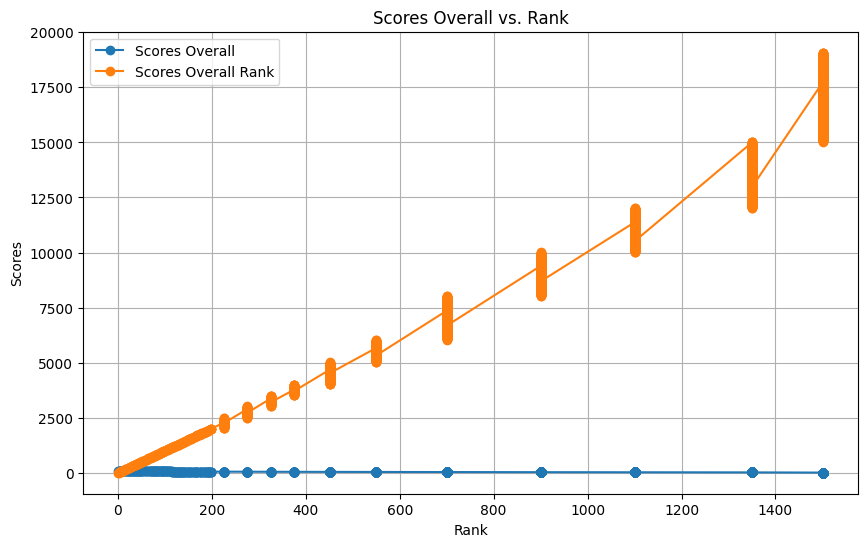

In [199]:
# در صورت نیاز، مرتب‌سازی داده‌ها
df = df.sort_values('rank')

plt.figure(figsize=(10, 6))
plt.plot(df['rank'], df['scores_overall'], label='Scores Overall', marker='o')
plt.plot(df['rank'], df['scores_overall_rank'], label='Scores Overall Rank', marker='o')
plt.xlabel('Rank')
plt.ylabel('Scores')
plt.title('Scores Overall vs. Rank')
plt.legend()
plt.grid()
plt.show()


In [191]:
correlation = df['scores_overall'].corr(df['scores_overall_rank'])
print(f"Correlation between Scores Overall and Scores Overall Rank: {correlation}")


Correlation between Scores Overall and Scores Overall Rank: -0.949493435001093


In [192]:
dataframes = {'dfRankUni': df,}

for name, df in dataframes.items():
    print(f"DataFrame {name} - Head:")
    print(df.head())
    print(f"DataFrame {name} - Columns:")
    print(df.columns)

DataFrame dfRankUni - Head:
   rank                                   name  scores_overall  \
0   1.0                   University of Oxford            98.5   
1   2.0                    Stanford University            98.0   
2   3.0  Massachusetts Institute of Technology            97.9   
3   4.0                     Harvard University            97.8   
4   5.0                University of Cambridge            97.5   

   scores_overall_rank  scores_teaching  scores_teaching_rank  \
0                   10             96.6                     5   
1                   20             99.0                     1   
2                   30             98.6                     2   
3                   40             97.7                     3   
4                   50             95.8                     7   

   scores_research  scores_research_rank  scores_citations  \
0            100.0                     2              99.0   
1             97.8                     8              99.6  

Now, we check the categorical variables and their categories to show the frequency of each values.

Histograms are useful for analyzing the frequency distribution of different values for each variable. In each histogram, the horizontal axis represents the variable values, and the vertical axis indicates the frequency or the number of times each value appears in the data. The height of each column reflects the frequency or the number of samples with a specific value in that interval.

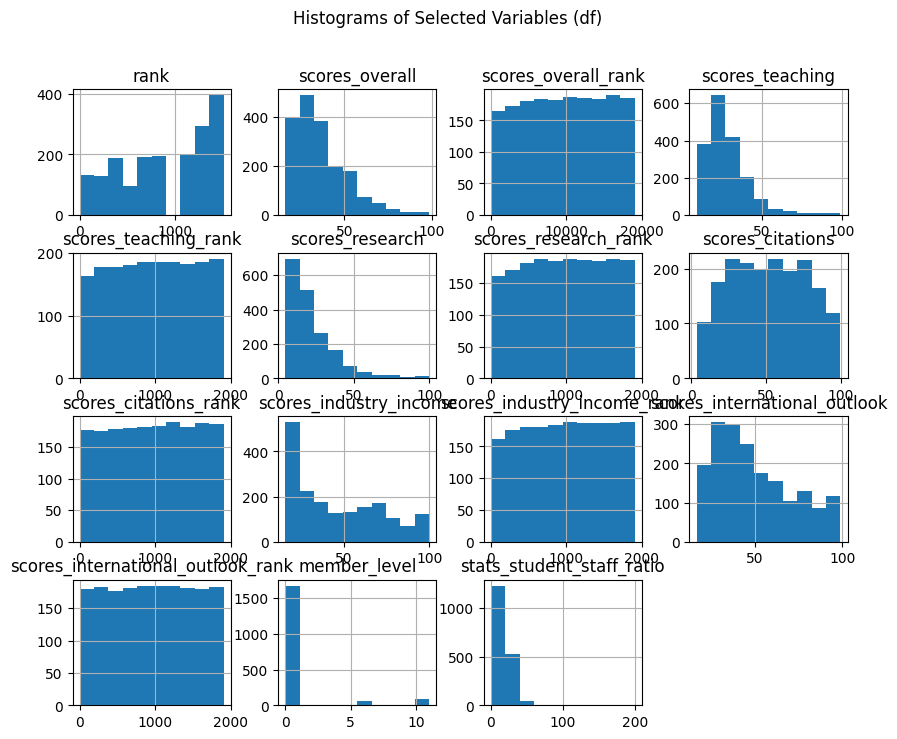

In [193]:
# Specify the columns you want to include in the analysis - df
selected_columns_df = [ 'rank', 'name', 'scores_overall', 'scores_overall_rank',
       'scores_teaching', 'scores_teaching_rank', 'scores_research',
       'scores_research_rank', 'scores_citations', 'scores_citations_rank',
       'scores_industry_income', 'scores_industry_income_rank',
       'scores_international_outlook', 'scores_international_outlook_rank',
       'record_type', 'member_level', 'location',
       'stats_number_students', 'stats_student_staff_ratio',
       'stats_pc_intl_students', 'stats_female_male_ratio',
       'stats_proportion_of_isr', 'aliases', 'subjects_offered']

# Create a DataFrame containing only the selected columns
selected_df = df[selected_columns_df]

# Plot histograms for each variable
selected_df.hist(figsize=(10, 8))
plt.suptitle('Histograms of Selected Variables (df)')
plt.show()

In [194]:
# Displaying some statistics about categorical data
dataframes = {'dfRankingUni': df,}

for name, df in dataframes.items():
    print(f"DataFrame {name} - Summary statistics for object-type columns:")
    print(df.describe(include='object'))

DataFrame dfRankingUni - Summary statistics for object-type columns:
                        name     record_type       location  \
count                   1817            1817           1817   
unique                  1817               3            108   
top     University of Oxford  master_account  United States   
freq                       1            1659            164   

       stats_number_students stats_pc_intl_students stats_female_male_ratio  \
count                   1817                   1817                    1817   
unique                  1775                     67                      78   
top                    7,271                     1%                55:45:00   
freq                       2                    215                      94   

       stats_proportion_of_isr               aliases  \
count                     1817                  1817   
unique                      57                  1817   
top                        24%  University of Oxfor

### 4.5 Data Transformation

#### 4.5.1 Transforming the categorical variables
In this step, we numerized object variables 
If we have a column that is object or if we have Boolean, we can convert them to integer.

In [195]:
df.describe()
df.describe(include='object')

,name,record_type,location,stats_number_students,stats_pc_intl_students,stats_female_male_ratio,stats_proportion_of_isr,aliases,subjects_offered
count,1817,1817,1817,1817,1817,1817,1817,1817,1817
unique,1817,3,108,1775,67,78,57,1817,1769
top,University of Oxford,master_account,United States,"7,271",1%,55:45:00,24%,University of Oxford,"Medicine & Dentistry,Other Health"
freq,1,1659,164,2,215,94,86,1,28


In [196]:
dataframes = {'dfRankUni': df,}

for name, df in dataframes.items():
    print(f"DataFrame {name}:")
    for column in df.columns:
        if df[column].dtype == 'object':
            unique_values = df[column].unique()
            print(f"Unique values for column '{column}':")
            print(unique_values)

DataFrame dfRankUni:
Unique values for column 'name':
['University of Oxford' 'Stanford University'
 'Massachusetts Institute of Technology' ... 'Yerevan State University'
 'Toyama Prefectural University' 'Zonguldak Bülent Ecevit University']
Unique values for column 'record_type':
['master_account' 'private' 'public']
Unique values for column 'location':
['United Kingdom' 'United States' 'Switzerland' 'Singapore' 'Canada'
 'Germany' 'Hong Kong' 'Australia' 'France' 'China' 'Belgium'
 'Netherlands' 'Sweden' 'Japan' 'South Korea' 'Russian Federation'
 'Denmark' 'Austria' 'Finland' 'Norway' 'Ireland' 'New Zealand' 'Spain'
 'Taiwan' 'Italy' 'South Africa' 'Macao' 'Saudi Arabia' 'Luxembourg'
 'India' 'Brazil' 'Israel' 'United Arab Emirates' 'Malaysia' 'Hungary'
 'Qatar' 'Iran' 'Estonia' 'Turkey' 'Czech Republic' 'Portugal'
 'Brunei Darussalam' 'Pakistan' 'Lebanon' 'Cyprus' 'Iceland' 'Greece'
 'Kazakhstan' 'Thailand' 'Vietnam' 'Northern Cyprus' 'Egypt' 'Poland'
 'Jordan' 'Ghana' 'Oman' 'Ukr